# Bellabeat Analyis | Python & Tableau


This is an individual project done as a capstone to the Google Data Analytics Professional Certificate.


Introduction


Executive Summary


1. Ask | Define Question/Task | Determine Objective
   
    -1.1 About Bellabeat
    -1.2 Products
    -1.3 Stakeholders
    -1.4 Define Objective

2.Prepare | Collect Data | Gather Data | Measure Data
    - 2.1 Data Used
Data comes from 

ROCCC (Reliable, Original, Comprehensible, Current, Cited)




3.Process | Clean Data | Wrangling/Munging Data

4.Analysis | Analyze Data | Interpreting Data

5.Recommendations | Offer Recommendations | Share Results


## ASK | Define Objective

### About Bellabeat

[**Bellabeat**](https://bellabeat.com/) is a tech-driven wellness company known for designing health-focused smart devices for women. The company states its products empower women by allowing them to better understand their bodies and make healthier choices. Their product line-up includes:



- **Leaf**: a wellness tracker that can be worn as a bracelet, necklace, or clip. 
- **Time**: a smart watch in the mold of classic time pieces 
- **Spring**: a smart water bottle tracking daily water intake

All of these smart devices run a software product, **Bellabeat App**, which tracks and offers guidance on users' activity, sleep, stress, menstrual cycle, and mindfulness habits.




[Link image]

### Key Stakeholders

- **Urška Sršen**: Bellabeat's cofounder and Chief Creative Officer
- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- **Bellabeat Marketing Analytics Team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 


### Business Objective

The CEO would like to understand how current consumers use non-Bellabeat smart devices and then leverage these insights to find opportunities for growth. Additionally, she would like recommendations for a marketing strategy informed by the findings of this analysis.  


## PREPARE | Collect Data

The data used for this analysis is a public domain (CC0 1.0 Universal Public Domain) dataset made available on Kaggle (via user MÖBIUS).

Data source: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)  

### Data Details
The data uploaded by Kaggle user MÖBIUS originates from respondents to a distributed survey via Amazon Mechanical Turk from March 12 to May 12, 2016. Thirty-three Fitbit users submitted personal tracker data collected in 18 files covering:
- Physical Activity (measured in Steps, Calories, and METs (metabolic equivalents)
- Sleep (measured in minutes)
- Heart rate (bpm)
- Weight/BMI (lbs/kg)

Data covers a 30-day period (04.12.16 - 05.12.16).



This analysis will focus on **Physical Activity** (daily, hourly), **Sleep** (daily), and **weight/bmi** to understand usage at a broader level. 


While 33 unique individuals provided data for physical activity, the other measured data contained fewer individuals.  
- Physical Activity: 33
- Sleep monitoring: 24
- Weight: 8
- Heart rate: 14 

### Licensing, Privacy, Security, Integrity
[CC0 1.0 Universal Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

All users participating in the survey consented to the submission of personal tracking data. The users' privacy has been protected by only identifying unique individuals via randomly generated ID numbers. This data has been provided by a 3rd party, the Kaggle user MÖBIUS.

### Data Integrity
- Sample selection bias since, insignificant 
- Variation in output due to different types of Fitbit trackers
- Variation in individual tracking behavior/preferences
- Concerns that there is no demographic data (sex, age, location) 
- Obsolescence - 5 years old




## PROCESS  | Wrangle Data 

Inspect, Wrangle, Validate Data
- Check data type, number of records, number of nulls, stat summary
- addition of columns for easier analysis _by day of week and hour
- We'll look at Physical Activity, Sleep, Weight/BMI

In [3]:
# Import relevant libraries and modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
from functools import reduce

### Activity Data

The most detailed and complete data is for logging physical activity. Various metrics for measuring physical exertion (Steps, Calories, METs) are provided whether measure by time or distance. Additionally, levels of intensity have been categorized into four levels ('VeryActive', 'FairlyActive', 'LightlyActive', 'Sedentary'). This data has also been recorded at differnt time scales (daily, hourly, and minute).   

#### Daily Activity Data

In [4]:
# Load daily activity data
path_1 ='../data/dailyActivity_merged.csv'

daily_activity = pd.read_csv(path_1).copy()
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

We have 940 rows of data with no null values. Activity is categorized into 4 intensities (Very Active, Light Active, Fairly Active, Sedentary) with values recorded by time (minutes) and distance (km). In addition, daily totals are calculated for steps, distance, and calories. 

Noticeably, data type for the `ActivityDate` column is object, so we'll convert to datetime.

In [5]:
# Preview activity dataframe
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
# Change 'ActivityDate' to datetime object
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']) 
print(daily_activity['ActivityDate'].dtypes)

datetime64[ns]


In [7]:
# Extract 'Day of Week' from 'ActivityDate' and store in new column to facilitate analysis
daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [8]:
# Check summary stat panel for activity data
daily_activity.describe(datetime_is_numeric=True)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


From a preliminary glance we see that the data covers a 1-month period (2016-04-12 to 2016-05-12), and that median values for `TotalSteps` (7406 steps) suggest that this group may of individuals may be more active than the typical American. Americans on average walk 3000-4,000 steps a day (https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391#:~:text=The%20average%20American%20walks%203%2C000,a%20day%20every%20two%20weeks.) 

In [9]:
# Validate number of unique individuals
daily_activity['Id'].nunique()

33

#### Hourly Activity Data

In [10]:
# Load then merge 3 separate files containing hourly activity data by steps, intensities, and calories

# Retrieve file names
path_2 = '../data/hourly'
file_names = glob.glob(path_2 + '*.csv')

# Read each file into a datframe and store in list
df_list = [pd.read_csv(file).copy() for file in file_names]

# Merge list of dataframes on 'Id' and 'ActivityHour' columns
hourly_activity = reduce(lambda left,right: pd.merge(left, right, how='outer', on=['Id', 'ActivityHour']), df_list )
    
# Preview merged dataframe 
hourly_activity.head()


,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,20,0.333333,81
1,1503960366,4/12/2016 1:00:00 AM,160,8,0.133333,61
2,1503960366,4/12/2016 2:00:00 AM,151,7,0.116667,59
3,1503960366,4/12/2016 3:00:00 AM,0,0,0.000000,47
4,1503960366,4/12/2016 4:00:00 AM,0,0,0.000000,48


In [11]:
# Inspect dataframe
hourly_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   StepTotal         22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   Calories          22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [12]:
# Convert 'ActivityHour' column to datetime object
hourly_activity['ActivityHour'] = pd.to_datetime(hourly_activity['ActivityHour'])
hourly_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   StepTotal         22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   Calories          22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.2 MB


In [13]:
# Check summary stat panel
hourly_activity.describe(datetime_is_numeric=True)

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,320.166342,12.035341,0.200589,97.386760
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,42.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,0.000000,0.000000,63.000000
50%,4.445115e+09,2016-04-26 06:00:00,40.000000,3.000000,0.050000,83.000000
75%,6.962181e+09,2016-05-03 19:00:00,357.000000,16.000000,0.266667,108.000000
max,8.877689e+09,2016-05-12 15:00:00,10554.000000,180.000000,3.000000,948.000000
std,2.422500e+09,NaN,690.384228,21.133110,0.352219,60.702622


In [14]:
# Extract 'Day of Week' from 'ActivityHour' 
hourly_activity['DayOfWeek'] = hourly_activity['ActivityHour'].dt.day_name()
hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday


In [15]:
# Validate number of unique individuals
hourly_activity['Id'].nunique()

33

### Sleep Data

In [16]:
# Load data 
path_3 =  '../data/sleepDay_merged.csv'

daily_sleep = pd.read_csv(path_3).copy()
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [17]:
# Check summary stat panel
daily_sleep.describe(datetime_is_numeric=True)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [18]:
# Inspect dataframe
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [19]:
# Convert 'SleepDay' to datetime object
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'])

# Extract 'Day of Week' from 'SleepDay' column
daily_sleep['DayOfWeek'] = daily_sleep['SleepDay'].dt.day_name()

daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [20]:
# Validate number of unique individuals
daily_sleep['Id'].nunique()

24

### Heart Rate Data

In [21]:
# Load and inspect heart rate data
path_4 = '../data/heartrate_seconds_merged.csv'

heartrate_df = pd.read_csv(path_4).copy()
heartrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [24]:
# Convert 'Time' to datetime object
'''
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])

heartrate_df.info()
'''

"\nheartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])\n\nheartrate_df.info()\n"

In [25]:
heartrate_df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [26]:
# Validate number of unique individuals
heartrate_df['Id'].nunique()

14

### Weight Data

In [27]:
# Load weight data
path_5 = '../data/weightLogInfo_merged.csv'

weight_df = pd.read_csv(path_5).copy()
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [28]:
# Convert 'Date' to datetime object
weight_df['Date'] = pd.to_datetime(weight_df['Date'])
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [29]:
# Validate number of unique individuals
weight_df['Id'].nunique()

8

There are only 8 unique individuals in this data

In [30]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


## ANALYZE

Usage

- 
- track physical activity and less so sleep, heart rate, and weight - Visual graph of how often people recorded info over 30 day period --- 4 panels 

#### Physical Activity
- by day of week
- by hour

### Activity

#### Daily Activity

In [32]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [33]:
# Number of records (how often tracker was used/worn during 30-day period)

# Find first activity record (by individual)
activity_usage = daily_activity.groupby('Id')[['ActivityDate']].min()

# Rename column
#activity_usage.rename( columns = {'ActivityDate':'FirstRecord'}, inplace=True)

# Find last activity record (by individual)
activity_usage['LastRecord'] = daily_activity.groupby('Id')[['ActivityDate']].max()

# Calculate period of time (days) monitored
activity_usage['ActiveUsage'] = activity_usage['LastRecord'] - activity_usage['ActivityDate'] + timedelta(days=1) 

# Count number of records (by individual)
activity_usage['NumberRecords'] = daily_activity.groupby(by='Id')[['Id']].count()

# Sort values by level of usage
activity_usage.sort_values(['ActiveUsage', 'NumberRecords'], ascending=False)

,ActivityDate,LastRecord,ActiveUsage,NumberRecords
Id,,,,
1503960366,2016-04-12,2016-05-12,31 days,31
1624580081,2016-04-12,2016-05-12,31 days,31
1844505072,2016-04-12,2016-05-12,31 days,31
1927972279,2016-04-12,2016-05-12,31 days,31
2022484408,2016-04-12,2016-05-12,31 days,31
2026352035,2016-04-12,2016-05-12,31 days,31
2320127002,2016-04-12,2016-05-12,31 days,31
2873212765,2016-04-12,2016-05-12,31 days,31
4020332650,2016-04-12,2016-05-12,31 days,31


We see that out of 33 individuals, only 4 used the tracker less than 3 weeks during the 1-month period suggesting that most users in this group made use of/wore the tracker to record physical activity. 

In [34]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


To understand how much physical activity individuals exert we'll use `TotalSteps` which is calculated by the Fitbit device taking the distance moved divided by the stride length (this is determined by using height measurements provided by the user). 

The Fitbit calculation for "`Calories` burned" is a less direct method to measure activity since the metric incorporates additional variables: heart rate (a faster rate will burn more calories) and the Basal Metabolic Rate (BMR) which estimates how many calories are burned at rest (estimated by Fitbit using user-provided height, gender, weight, age) 


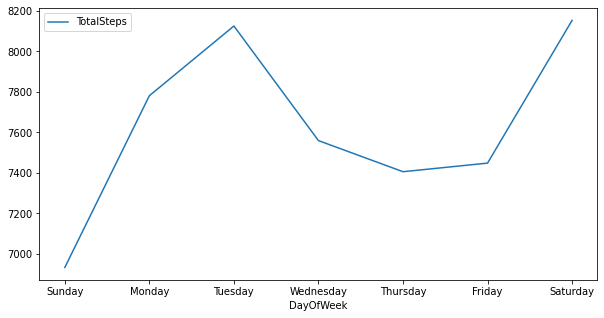

In [35]:
# Examine intensity of activity (by weekday)

# Set index order for days of the week
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

daily_activity.groupby(by='DayOfWeek').mean().reindex(weekday_order).plot(y='TotalSteps', figsize=(10,5));

On average, we see that peak activity occurs on Monday, Tuesday, and Saturday, while dips occur on Sunday, Thursday, and Friday. 


We can also get a more refined measure of intensity by examining how long (in minutes) a user exerts oneself. Fitbit has 4 categories measured by number of steps per minute or heart rate: `VeryActiveMinutes`,`FairlyActiveMinutes`, `LightlyActiveMinutes`, `SedentaryMinutes`.

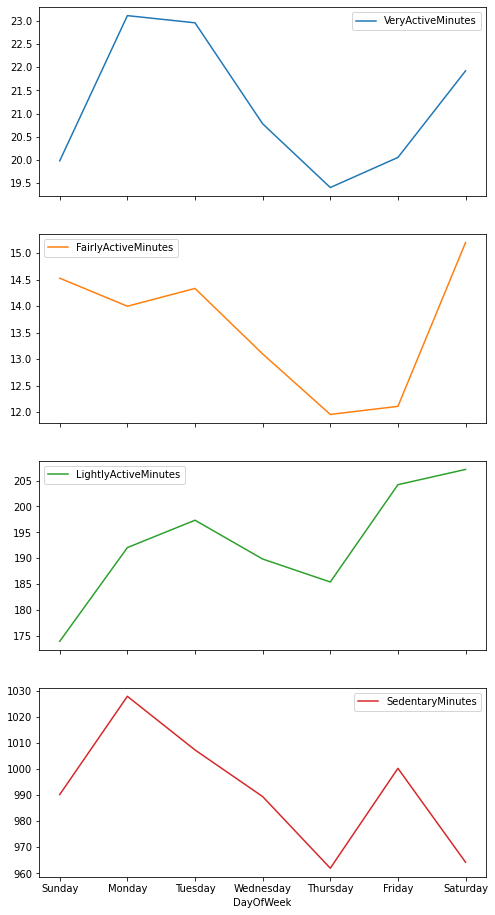

In [36]:
daily_intensity = daily_activity.groupby(by='DayOfWeek').mean().reindex(weekday_order)[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

daily_intensity.plot(subplots=True, figsize=(8,16));


By breaking out the activity metric by levels of intensity, we get a more refined picture of usage.

*Monday, Tuesday*
At the beginning of the work week we see peaks in both high intensity `VeryActiveMinutes` and inactivity `SedentaryMinutes`. Even among the middle categories of intensity `FairlyActiveMinuetes` and `LightlyActiveMinutes`, we see users staying moderately active. On Tuesday, more users become more active as `SedentaryMinutes` trend down, while we see a slight increase in both levels of moderate intensity, and the most active `VeryActiveMinutes` staying high.    

*Wednesday*
Midweek we see a large decrease at the higher intensities (`VeryActiveMinutes`,`FairlyActiveMinuetes`), and a lesser decrease with `LightlyActiveMinutes`and `SedentaryMinutes`.

*Thursday, Friday*
Heading into the end of the work week, Thursday shows lows relative lows across all intensities with only a slight decrease in `LightlyActiveMinutes`suggesting that most users have shifted to lighter intensity activities like walking. On Friday, there is still a trend to avoid moderate or high intensity activities indicated by the relatively low`VeryActiveMinutes` and `FairlyActiveMinutes`. However, engaging in low-intensity activities move towards a weekly peak as well as some users deciding to rest as indicated by a relative peak in `SedentaryMinutes`.

*Saturday, Sunday*
At the beginning of the weekend, we see high levels of activity at all active intensities (`VeryActiveMinutes`, `FairlyActiveMinuetes`, `LightlyActiveMinutes`) and a accompanying drop in `SedentaryMinutes`. As the weekend draws to a close on Sunday, users are engaging in moderately intense activites (`FairlyActiveMinutes`) or resting (`SedentaryMinutes`).




There is a relative higher level of `LightlyActiveMinutes` on Thursday and Friday perhaps reflecting individuals are recovering from more strenuous workouts earlier in the week and opting instead for lower intensity exercise. 

Interestingly, the only intensity value to have relatively high levels on Sunday is `FairlyActiveMinutes` suggesting that people may still want to remain active on this day, but do not push to the extreme.  


Takeaway: 
- high-intensity activities are happening at the beginning of the work week (Mon, Tues) and weekend (Sat)
- End of the week tends to be lighter intensity activity
- Rest occurs in the beginning part of the week (Sun-Wed) and (Friday)

Marketing Strategy--- 

[Possible graphic] stacked line graph.

### Hourly Activity

We'll now examine activity by hour.

In [37]:
hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday


In [38]:
# Extract hour of day from 'ActivityHour' and store in new column 'Hour'
hourly_activity['Hour'] = hourly_activity['ActivityHour'].dt.hour

hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek,Hour
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday,4


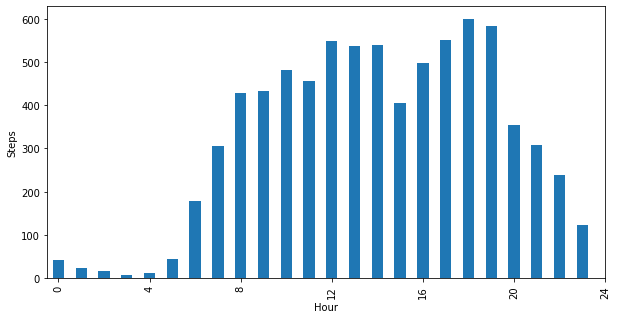

In [39]:
# Plot average activity levels by hour using 'StepTotal'
hourly_activity.groupby(by='Hour')['StepTotal'].mean().plot(kind='bar', xticks=np.arange(0,25,4), figsize=(10,5))
plt.ylabel('Steps');



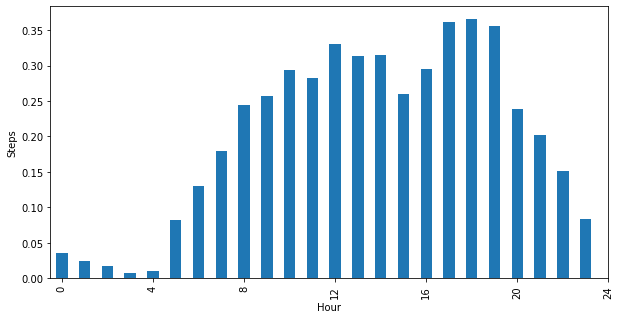

In [40]:
# Plot average activity levels by hour using 'AverageIntensity'

hourly_activity.groupby(by='Hour')['AverageIntensity'].mean().plot(kind='bar', xticks=np.arange(0,25,4), figsize=(10,5))
plt.ylabel('Steps');


We see peak activity occurring between 17:00-19:00 and 12:00-14:00, suggesting that most activity is occurring after work in the early evening and around the typical lunch hour. Least active times not surprisingly occurs from midnight to 4:00 when most people are typically asleep.   

In [41]:
hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek,Hour
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday,4


In [42]:
# Compare activity across the days of the week
hourly_intensity = hourly_activity.groupby(by=['DayOfWeek', 'Hour'])[['StepTotal']].mean()

hourly_intensity.head()

StepTotal
DayOfWeek Hour           
Friday    0     44.277778
          1     19.007937
          2     16.277778
          3     10.801587
          4     14.436508

In [43]:
# Reshape data for plotting by pivoting 'DayOfWeek' from index to column  
hourly_intensity = hourly_intensity.unstack(level=0)
hourly_intensity.head()


StepTotal                                                         \
DayOfWeek     Friday     Monday   Saturday     Sunday   Thursday    Tuesday   
Hour                                                                          
0          44.277778  30.008333  55.203252  82.595041  31.282759  28.346667   
1          19.007937  17.283333  18.877049  52.669421  16.262069  25.540000   
2          16.277778   6.766667  13.573770  49.636364  11.579310  10.686667   
3          10.801587   8.541667   9.475410   4.785124   4.737931   5.706667   
4          14.436508  18.808333  10.032787   5.652893   8.131944  16.966667   

                      
DayOfWeek  Wednesday  
Hour                  
0          31.221477  
1          14.906040  
2          14.476510  
3           2.228188  
4          14.335570

In [44]:
# Remove multi-layer columns 
hourly_intensity.columns = hourly_intensity.columns.droplevel(0)
hourly_intensity.head()

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,44.277778,30.008333,55.203252,82.595041,31.282759,28.346667,31.221477
1,19.007937,17.283333,18.877049,52.669421,16.262069,25.540000,14.906040
2,16.277778,6.766667,13.573770,49.636364,11.579310,10.686667,14.476510
3,10.801587,8.541667,9.475410,4.785124,4.737931,5.706667,2.228188
4,14.436508,18.808333,10.032787,5.652893,8.131944,16.966667,14.335570


In [45]:
# Reorder columns to follow Sunday-thru-Saturday weekday ordering
hourly_intensity.columns = weekday_order
hourly_intensity.head()


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Hour,,,,,,,
0,44.277778,30.008333,55.203252,82.595041,31.282759,28.346667,31.221477
1,19.007937,17.283333,18.877049,52.669421,16.262069,25.540000,14.906040
2,16.277778,6.766667,13.573770,49.636364,11.579310,10.686667,14.476510
3,10.801587,8.541667,9.475410,4.785124,4.737931,5.706667,2.228188
4,14.436508,18.808333,10.032787,5.652893,8.131944,16.966667,14.335570


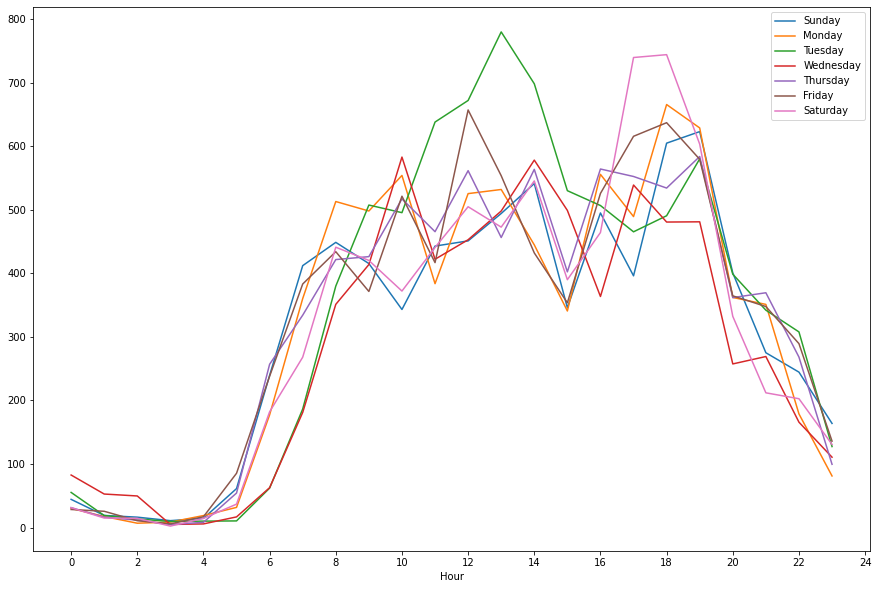

In [46]:
# Compare hourly activity by day of week
hourly_intensity.plot(subplots=False, figsize=(15,10), layout=(7,1), xticks=np.arange(0,25,2));

Hourly activity by day of week appears to follow the general pattern of dual peaks around midday and early evening.

However, some minor observations can be made: Tuesdays show higher levels of activity over other days with a preference for the  mid-day peak. On Saturdays, there is a comparatively higher level of activity than other days during the evening peak.


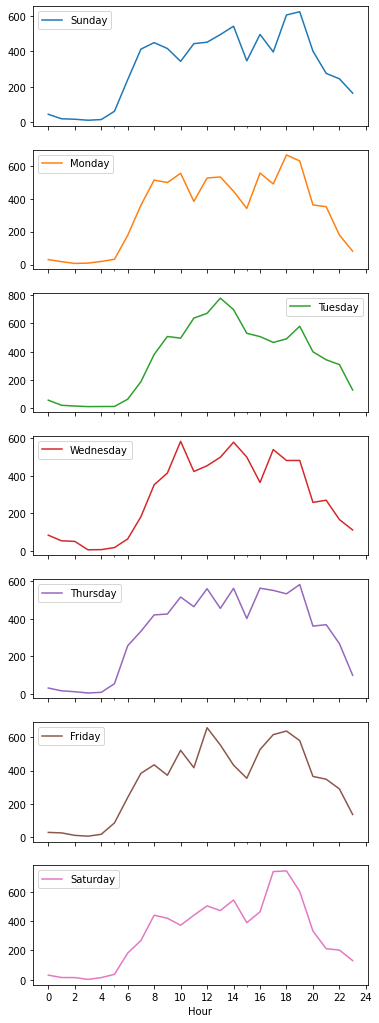

In [47]:
hourly_intensity.plot(subplots=True, figsize=(6,18), layout=(7,1), xticks=np.arange(0,25,2));

### Sleep Monitoring

Notably we have only 24 out of 33 individuals providing sleep data. Let's explore the data more to see if there any other differences with our physical activity data.

Since it appears that this data is not complete, let's investigate further by finding out how often and when individuals recorded their sleep.

In [48]:
# Find first sleep record
sleep_validate = daily_sleep.groupby(by='Id')[['SleepDay']].min()

# Find last sleep record
sleep_validate['Last_Record'] = daily_sleep.groupby(by='Id')[['SleepDay']].max()

# Calculate period of time (days) monitored
sleep_validate['Period_Recorded'] = sleep_validate['Last_Record'] - sleep_validate['SleepDay'] + timedelta(days=1)

# Count number of sleep records per individual
sleep_validate['Number_Records'] = daily_sleep.groupby(by='Id')['TotalMinutesAsleep'].count()

sleep_validate.sort_values(['Number_Records', 'Period_Recorded'], ascending=False)

,SleepDay,Last_Record,Period_Recorded,Number_Records
Id,,,,
8378563200,2016-04-12,2016-05-12,31 days,32
5553957443,2016-04-12,2016-05-12,31 days,31
6962181067,2016-04-12,2016-05-12,31 days,31
2026352035,2016-04-12,2016-05-12,31 days,28
4445114986,2016-04-12,2016-05-12,31 days,28
4702921684,2016-04-12,2016-05-12,31 days,28
3977333714,2016-04-12,2016-05-10,29 days,28
5577150313,2016-04-12,2016-05-11,30 days,26
4319703577,2016-04-14,2016-05-12,29 days,26


Of the individuals that recorded sleep data, roughly half of them recorded their sleep less than 24 times over the 31-day period. This suggests that even among those who chose to monitor their sleep (24 out of the 33 individuals in the dataset), half of them did not consistently take advantage of this capability.  

Perhaps they 1) did not see the benefit in tracking their sleep, or 2) found it difficult to do so. Potential content for marketing, since Bellabeat also has a sleep tracking functionality.

In [49]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


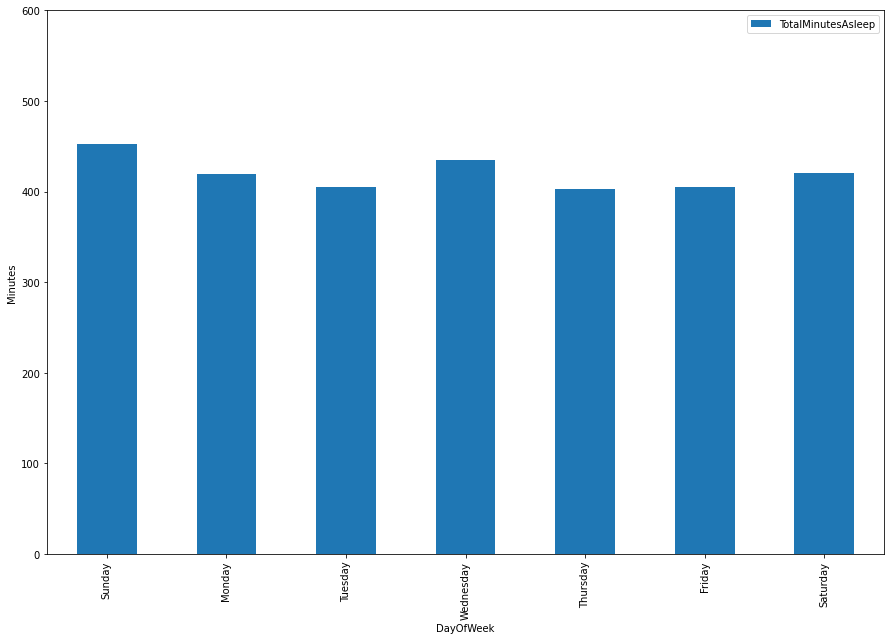

In [50]:
# Analyze sleep habits by day of week
daily_sleep.groupby(by='DayOfWeek')[['TotalMinutesAsleep']].mean().reindex(weekday_order).plot(kind='bar', figsize=(15,10), ylim=(0,600))
plt.ylabel('Minutes');


We see that individuals get the most sleep on Sunday and Wednesday. 



In [51]:
daily_sleep.groupby(by='DayOfWeek')[['TotalMinutesAsleep']].mean().describe()

,TotalMinutesAsleep
count,7.000000
mean,419.913736
std,18.494339
min,402.369231
25%,404.979757
50%,418.829787
75%,427.746082
max,452.745455


On average, users are getting about 7 hours of sleep (which is in line with the recommended 6-8 hours). Variation by day roughly does not exceed 20 minutes (std 18.5 min) in either direction.

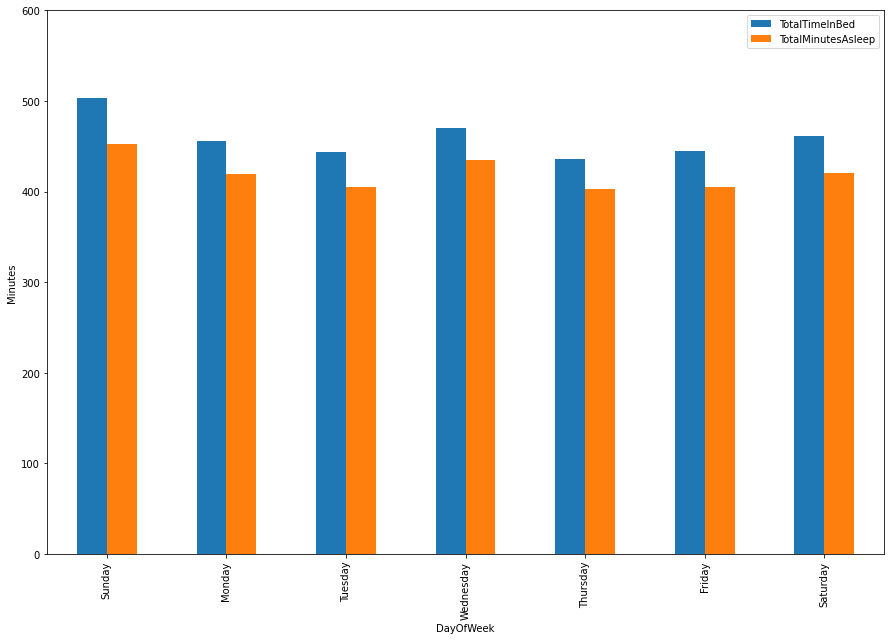

In [67]:
# Analyze sleep habits by day of week
daily_sleep.groupby(by='DayOfWeek')[['TotalTimeInBed', 'TotalMinutesAsleep']].mean().reindex(weekday_order).plot(kind='bar', figsize=(15,10), ylim=(0,600))
plt.ylabel('Minutes');


           

In [73]:
## Time to fall asleep
daily_sleep['TimeToFallAsleep'] = daily_sleep['TotalTimeInBed'] - daily_sleep['TotalMinutesAsleep']
daily_sleep.head()
daily_sleep.groupby(by='DayOfWeek')[['TimeToFallAsleep']].mean().reindex(weekday_order)





,TimeToFallAsleep
DayOfWeek,
Sunday,50.763636
Monday,37.340426
Tuesday,38.753846
Wednesday,35.348485
Thursday,33.430769
Friday,39.631579
Saturday,40.465517


In [74]:
# Is there correlation between activity and how long it takes to fall asleep?
daily_sleep.head()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek,TimeToFallAsleep
0,1503960366,2016-04-12,1,327,346,Tuesday,19
1,1503960366,2016-04-13,2,384,407,Wednesday,23
2,1503960366,2016-04-15,1,412,442,Friday,30
3,1503960366,2016-04-16,2,340,367,Saturday,27
4,1503960366,2016-04-17,1,700,712,Sunday,12


In [75]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


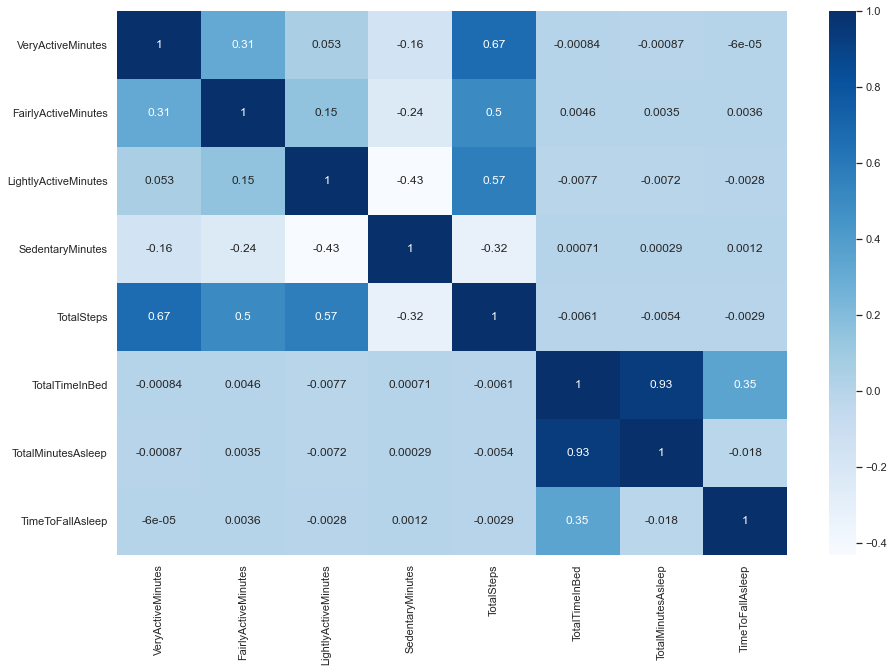

In [80]:
daily_activity_intensity = daily_activity[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','TotalSteps', 'DayOfWeek']]
daily_sleep_monitoring = daily_sleep[['TotalTimeInBed','TotalMinutesAsleep', 'TimeToFallAsleep', 'DayOfWeek']]

activity_sleep = pd.merge(daily_activity_intensity, daily_sleep_monitoring , how='left', left_on=['DayOfWeek'], right_on=['DayOfWeek'])

plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = activity_sleep.corr()
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)
heatmap;


In [ ]:
act_sleep = pd.merge(act_daily_12, sleep_day_12, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = act_sleep.corr()
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)
heatmap;

### Heart Rate 

In [53]:
heartrate_df.describe(datetime_is_numeric=True)

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


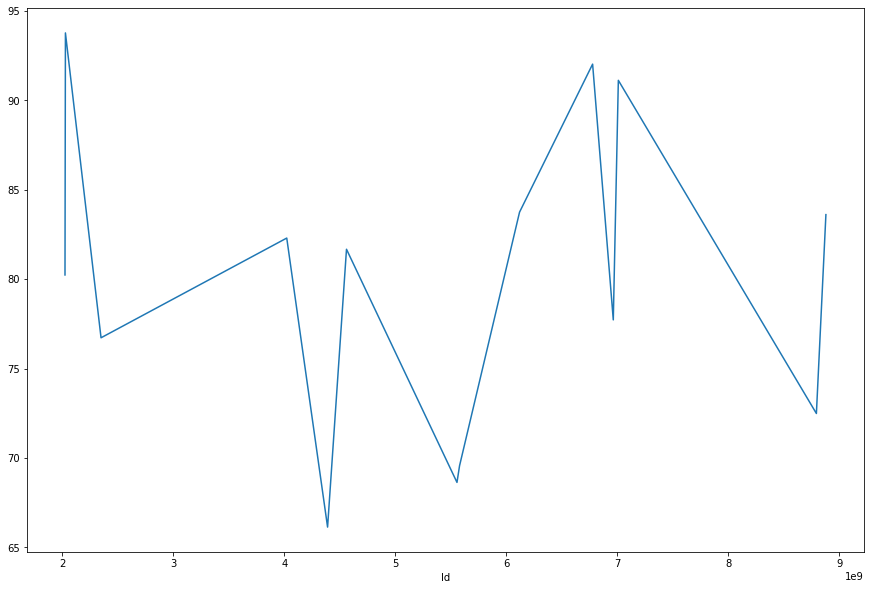

In [54]:
heartrate_df.groupby(by='Id')['Value'].mean().plot(figsize=(15,10));

Heart rate info typically are assessed relative to demographic info such as gender and age. 

### Weight

In [55]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [56]:
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [57]:
weight_df.describe(datetime_is_numeric=True)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,2016-04-27 15:39:54.283582208,72.035821,158.811801,23.50000,25.185224,1.461772e+12
min,1.503960e+09,2016-04-12 06:47:11,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,2016-04-19 15:19:45,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,2016-04-27 23:59:59,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,2016-05-04 15:24:10.500000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,2016-05-12 23:59:59,133.500000,294.317120,25.00000,47.540001,1.463098e+12
std,1.950322e+09,NaN,13.923206,30.695415,2.12132,3.066963,7.829948e+08


According to CDC, healthy BMI range is : 18.5—24.9


https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults

All 8 individuals fall within the healthy range for BMI according to the CDC. 


In [58]:
# True weight is input manually, False means synched with Fitbit.com via connected scale
weight_df['IsManualReport'].value_counts()

True     41
False    26
Name: IsManualReport, dtype: int64

In [59]:
weight_df.groupby(by='Id')['IsManualReport'].value_counts()

Id          IsManualReport
1503960366  True               2
1927972279  False              1
2873212765  True               2
4319703577  True               2
4558609924  True               5
5577150313  False              1
6962181067  True              30
8877689391  False             24
Name: IsManualReport, dtype: int64

5 individuals manually input their weight while 3 automatically provided weight info via a Fitbit.com connected scale.

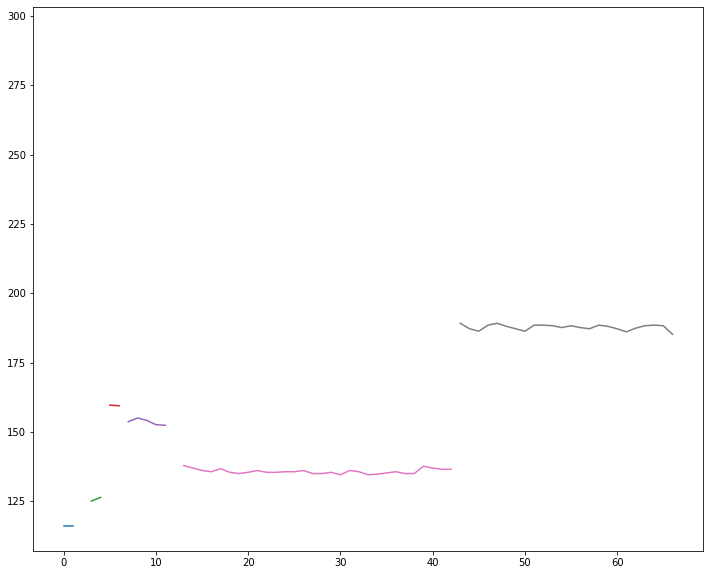

In [60]:
weight_df.groupby(by='Id')['WeightPounds'].plot(figsize=(12, 10));

## Load & Inspect Data 

Check for: 
1. Missing/null values 
2. Errors/Typos
3. Duplicates

Validate:
1. Check ranges and stats
2. Check data type
3. 



In [61]:
# Minute Activity Data (Calories & Intensities & METS)

path_5 ='../data/minuteCaloriesNarrow_merged.csv'
path_6 ='../data/minuteIntensitiesNarrow_merged.csv'
path_7 ='../data/minuteMETsNarrow_merged.csv'


min_cal = pd.read_csv(path_5).copy()
min_cal.head()



,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [62]:
min_int = pd.read_csv(path_6).copy()
min_int.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [63]:
min_mets = pd.read_csv(path_7).copy()
min_mets.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [64]:
# Merge minute activity data

act_min = pd.merge(min_cal, min_int, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()


,Id,ActivityMinute,Calories,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [65]:
act_min = pd.merge(act_min, min_mets, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()





,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10


In [66]:
# Change ActivityMinute to datetime type

act_min['ActivityMinute'] = pd.to_datetime(act_min['ActivityMinute'])

act_min.head()




KeyboardInterrupt: 

In [ ]:
act_min.Id.nunique()

In [ ]:
# Sleep Data

path_8 = '../data/minuteSleep_merged.csv'
path_9 =  '../data/sleepDay_merged.csv'

sleep_min = pd.read_csv(path_8).copy()
sleep_min.head()



In [ ]:
sleep_min['date'] = pd.to_datetime(sleep_min['date'])
sleep_min.head()
                                

In [ ]:
# Check number of unique individuals in data
sleep_min.Id.nunique()

In [ ]:
sleep_day = pd.read_csv(path_9).copy()
sleep_day.head()

In [ ]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day.head()                           

In [ ]:
# Check how many unique individuals are in data
sleep_day.Id.nunique()

In [ ]:
# Heart Rate

path_10 = '../data/heartrate_seconds_merged.csv'

heartrate_df = pd.read_csv(path_10).copy()
heartrate_df.head()


In [ ]:
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])
heartrate_df.head()

In [ ]:
# Check how many unique individuals are in this data
heartrate_df.Id.nunique()

In [ ]:
# Weight Log

path_11 = '../data/weightLogInfo_merged.csv'

weight_df = pd.read_csv(path_11).copy()

weight_df.head()



In [ ]:
weight_df['Date'] = pd.to_datetime(weight_df['Date'])

weight_df.head()

weight_df.Id.nunique()

## Analyze

Understanding usage:
- Levels of activity throughout the week
- Levels of activity throughout the day
- Levels of intensity for each activity session (suggests type of activity: ie. HIIT, endurance, etc.)

### Levels of throughout the week (by day)

In [ ]:
# set order for indexing
weekorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

act_hour.groupby(by="DayOfWeek").mean().reindex(weekorder).plot(y=['AverageIntensity'], figsize=(15,10));
        

Peak days of Activity appear to be Saturday, Tuesday, Monday, Friday (in descending order).

### Levels of activity throughout the day (by hour)

In [ ]:
# Extract hour from datetime to understand activity throughout the day

act_hour['Hour'] = act_hour['ActivityHour'].dt.hour

act_hour.groupby(by=['Hour']).mean().plot(y=['AverageIntensity'], figsize=(15,10));


Peak Activity times occur around lunch (11:00-13:00) and after work/dinner (17:00-19:00).

### Levels of Intensity throughout each activity session (by minute)

In [ ]:
act_min.describe()

In [ ]:
act_min.info()

In [ ]:
#Extract Minute from datetime

act_min['Minute'] = act_min['ActivityMinute'].dt.minute
act_min.head()

## Correlations

### Sleep vs Activity

In [ ]:
sleep_day.head()

In [ ]:
# Because Sleep data only contains 24 individuals, we'll limit analysis on our Activity data to those same individuals
# Data from 2016-04-12 to 2016-05-12
sleep_day['SleepDay'].describe(datetime_is_numeric=True)


In [ ]:
# Find First Sleep Record
sleep_validate = sleep_day.groupby(by='Id')[['SleepDay']].min()

# Find Last Sleep Record
sleep_validate['Last_Record'] = sleep_day.groupby(by='Id')[['SleepDay']].max()

# Calculate period of time (days) monitored
sleep_validate['Period_Recorded'] = sleep_validate['Last_Record'] - sleep_validate['SleepDay']

# Count number of sleep records per individual
sleep_validate['Number_Records'] = sleep_day.groupby(by='Id')['TotalMinutesAsleep'].count()

sleep_validate.sort_values(['Number_Records', 'Period_Recorded'], ascending=False)

Of the 24 individuals that recorded sleep data, roughly half had fewer than 24 records over a 30 day period. In order to use data with sufficient data for comparison, we'll only retain data from the 12 individuals with at least 24 records taken over more than 26 days. 

In [ ]:
# Reducing Sleep Data to individuals with sufficient number of records

sleep_ids = sleep_validate[sleep_validate['Number_Records'] >= 24].index.values.astype(int)
sleep_ids



In [ ]:
# create a mask to filter out individuals that aren't part of the 12-person sleep data
mask = df['Id'].isin(sleep_ids)
mask

In [ ]:
# Filtered the Daily Activity Data with mask (only 12 individuals)
act_daily_12 = df[mask]
act_daily_12

In [ ]:
# Filter sleep data for the 12 individuals

mask_2 = sleep_day['Id'].isin(sleep_ids)
mask_2


In [ ]:
sleep_day_12 = sleep_day[mask_2]
sleep_day_12

In [ ]:
# Now find correlations between daily activity and sleep among these 12 individuals

act_daily_12 

sleep_day_12



In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = act_daily_12.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues')


In [ ]:
act_daily_12.head()

In [ ]:
sleep_day_12.head()

In [ ]:
# merge activity and sleep dataframes
act_sleep = pd.merge(act_daily_12, sleep_day_12, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = act_sleep.corr()
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)
heatmap;


In [ ]:
# Focus on relationship between total minutes asleep and activity levels in minutes
act_sleep_min = act_sleep[['TotalMinutesAsleep', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
act_sleep_min.head()

# Exclude Null Rows in Sleep Data
act_sleep_min_clean = act_sleep_min[act_sleep_min['TotalMinutesAsleep'].notna()]

# Pairplot

sns.pairplot(act_sleep_min_clean, kind='reg');


In [ ]:
# Export compiled dataframes as csv for Tableau 
path_10 = '../data/act_min_tableau.csv'
path_11 = '../data/act_hour_tableau.csv'
path_12 = '../data/act_daily_tableau.csv'

act_min.to_csv(path_10, index=False)
act_hour.to_csv(path_11, index=False)
df.to_csv(path_12, index=False)

# SHARE | Recommendations

Caveats:

Marketing strategy

Fitbit and Bellabeat have slightly different target audiences: Fitbit is more sporty while Bellabeat is focused on women who care about health and fashion (smart jewlery)